In [682]:
import pandas as pd

In [683]:
import numpy as np

In [684]:
df=pd.read_csv("train.csv",na_values=[' '])
pf=pd.read_csv("train.csv",na_values=[' '])
test_df=pd.read_csv("test.csv")
test=pd.read_csv("test.csv")
# df=df.dropna()
# df

In [672]:
# import sys
# !{sys.executable} -m pip install datawig

In [658]:
# imputer = datawig.SimpleImputer(
#     input_columns=['year', 'month'],
#     output_column='passengers'
#     )
# imputer.fit(train_df = flights_train)
# imputed = imputer.predict(flights_test)

In [659]:
# # df['occupation_type'].unique()
# a=df[df['credit_card_default']==1]['occupation_type'].value_counts()
# a

In [660]:
# df=df[(df['credit_score']> 516.436671172104) & (df['credit_score']< 1069.824783653562)]


In [685]:
X=df.drop(['customer_id','name','credit_card_default','no_of_children'],axis=1)
y=df[['credit_card_default']]
test_df=test_df.drop(['customer_id','name','no_of_children'],axis=1)
# X=X.replace('Unknown',np.nan)
# test_df=test_df.replace('Unknown',np.nan)
# X['customer_id']=X['customer_id'].apply(lambda x:x[4:]) 
# test_df['customer_id']=test_df['customer_id'].apply(lambda x:x[4:]) 


In [628]:
print(X[X['occupation_type']=='Unknown']['credit_score'].mean())
print(X[X['occupation_type']=='Laborers']['credit_score'].mean())

787.4076949982511
777.5094687653714


In [629]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45528 non-null  int64  
 1   gender                   45528 non-null  object 
 2   owns_car                 44981 non-null  object 
 3   owns_house               45528 non-null  object 
 4   net_yearly_income        45528 non-null  float64
 5   no_of_days_employed      45065 non-null  float64
 6   occupation_type          45528 non-null  object 
 7   total_family_members     45445 non-null  float64
 8   migrant_worker           45441 non-null  float64
 9   yearly_debt_payments     45433 non-null  float64
 10  credit_limit             45528 non-null  float64
 11  credit_limit_used(%)     45528 non-null  int64  
 12  credit_score             45520 non-null  float64
 13  prev_defaults            45528 non-null  int64  
 14  default_in_last_6month

In [630]:
# df['rp']=df['net_yearly_income'].apply(lambda x:1 if x>200655.62224916535 else 0)
# test_df['rp']=test_df['net_yearly_income'].apply(lambda x:1 if x>198708.40543705528 else 0)

In [631]:
print(X[X['occupation_type']=='Laborers']['net_yearly_income'].max())
print(X[X['occupation_type']!='Laborers']['net_yearly_income'].max())

140759012.73
4433825.02


In [632]:
# import seaborn as sns

# sns.pairplot(df,hue='credit_card_default')

In [633]:
# getting rid of the outliers

# df=df[(df['default_in_last_6months']>-0.6066381161101927) & (df['default_in_last_6months']<0.7077187697738722)]
# getting rid of the outliers

# test_df=test_df[(test_df['default_in_last_6months']>-0.6066381161101927) & (test_df['default_in_last_6months']<0.7077187697738722)]

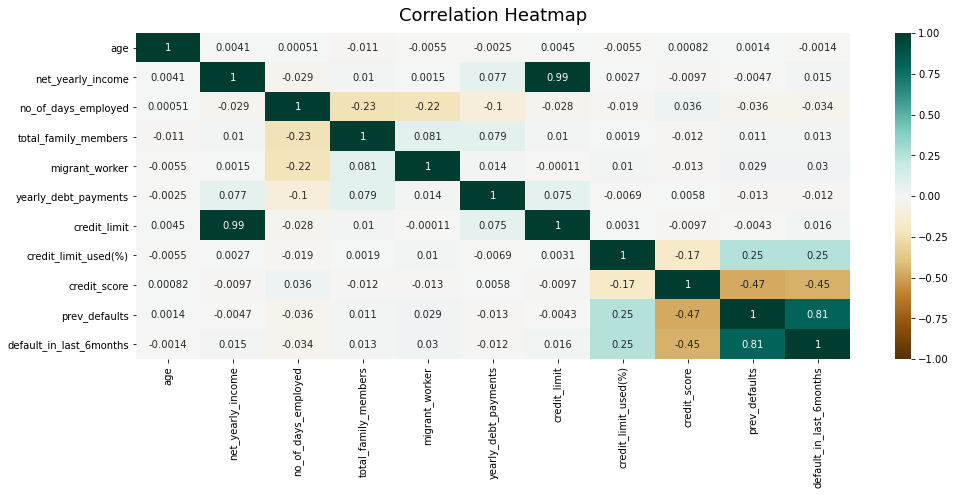

In [634]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [635]:
# for col in X.columns:
#     print(pd.isna(X[col]).value_counts())

In [636]:
# sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [686]:
for col in X:
    # Check if the column is of object type
    if X[col].dtypes == 'object':
        # Impute with the most frequent value
        X = X.fillna(X[col].value_counts().index[1])
    else:
        X = X.fillna(X[col].mean())
        
        
for col in test_df:
    # Check if the column is of object type
    if test_df[col].dtypes == 'object':
        # Impute with the most frequent value
        test_df = test_df.fillna(test_df[col].value_counts().index[1])
          
    else:
        test_df = test_df.fillna(test_df[col].mean())

In [638]:
# sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [597]:
# for col in X.columns:
#     print(pd.isna(X[col]).value_counts())

# print()
# # 
# for col in test_df.columns:
#     print(pd.isna(test_df[col]).value_counts())

In [598]:
# X_new = X_new.apply(lambda x:x.fillna(x.mode()))
# test_new = test_new.apply(lambda x:x.fillna(x.mode()))
# for col in X_new.columns:
#     print(pd.isna(X_new[col]).value_counts())

In [599]:
# for i in X.columns:
#     print("{} {}".format(i,X[i].value_counts()))
    
# print()    

# for i in test_df.columns:
#     print("{} {}".format(i,test_df[i].value_counts()))

In [600]:
test_df[test_df['occupation_type']=='Unknown']['occupation_type'].value_counts()
test_df.shape[0]

11383

In [601]:
l=test_df['no_of_days_employed'].tolist()
t1=0
t2=0
for i in range(len(l)):
    if type(l[i])!=str:
        t1+=1
        t2+=l[i]
print(t2/t1)

64915.78561586389


In [692]:
l=X['owns_car'].tolist()
l1=df['gender'].tolist()
for i in range(len(l)):
    if type(l[i])!=str:
        if l1[i]=='M':
            l[i]='Y'
        else:
            l[i]='N'
        
X['owns_car']=pd.DataFrame(l,columns=['owns_car'])
        
l=test_df['owns_car'].tolist()
l1=test['gender'].tolist()

for i in range(len(l)):
    if type(l[i])!=str:
        if l1[i]=='M':
            l[i]='Y'
        else:
            l[i]='N'

test_df['owns_car']=pd.DataFrame(l,columns=['owns_car'])


l=X['credit_score'].tolist()
for i in range(len(l)):
    if type(l[i])!=str:
        l[i]='Unknown'
#     if l[i]=='Unknown':
#         if abs(l1[i]-787.4076949982511)>(abs(l1[i]-777.5094687653714)):
#             l[i]='Laborers'
        
X['occupation_type']=pd.DataFrame(l,columns=['occupation_type'])
        
l=test_df['occupation_type'].tolist()

for i in range(len(l)):
    if type(l[i])!=str or l[i]=='Unknown':
        l[i]='Laborers'

test_df['occupation_type']=pd.DataFrame(l,columns=['occupation_type'])






# l=X['no_of_children'].tolist()
# for i in range(len(l)):
#     if type(l[i])!=float:
#         l[i]=0.0
        
# X['no_of_children']=pd.DataFrame(l,columns=['no_of_children'])
        
# l=test_df['no_of_children'].tolist()

# for i in range(len(l)):
#     if type(l[i])!=float:
#         l[i]=0.0

# test_df['no_of_children']=pd.DataFrame(l,columns=['no_of_children'])




l=X['no_of_days_employed'].tolist()
for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=69558.48426442528
        
X['no_of_days_employed']=pd.DataFrame(l,columns=['no_of_days_employed'])
        
l=test_df['no_of_days_employed'].tolist()

for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=64915.78561586389

test_df['no_of_days_employed']=pd.DataFrame(l,columns=['no_of_days_employed'])




l=X['total_family_members'].tolist()
for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=2.0
        
X['total_family_members']=pd.DataFrame(l,columns=['total_family_members'])
        
l=test_df['total_family_members'].tolist()

for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=2.0

test_df['total_family_members']=pd.DataFrame(l,columns=['total_family_members'])





l=X['migrant_worker'].tolist()
for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=0.0
        
X['migrant_worker']=pd.DataFrame(l,columns=['migrant_worker'])
        
l=test_df['migrant_worker'].tolist()

for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=0.0

test_df['migrant_worker']=pd.DataFrame(l,columns=['migrant_worker'])



l=X['yearly_debt_payments'].tolist()
for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=31864.163464689536
        
        
X['yearly_debt_payments']=pd.DataFrame(l,columns=['yearly_debt_payments'])
        
l=test_df['yearly_debt_payments'].tolist()

for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=32017.044324525785

test_df['yearly_debt_payments']=pd.DataFrame(l,columns=['yearly_debt_payments'])






l=X['credit_score'].tolist()
for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=799.0378490818669
        
        
X['credit_score']=pd.DataFrame(l,columns=['credit_score'])
        
l=test_df['credit_score'].tolist()

for i in range(len(l)):
    if type(l[i])!=float:
        l[i]=784.1930263560403

test_df['credit_score']=pd.DataFrame(l,columns=['credit_score'])

In [693]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# # # Instantiate MinMaxScaler and use it to rescale X_train and X_test
# # scaler = StandardScaler()
# scaler = MinMaxScaler()

# # for col in X.columns:
# #     if X[col].dtypes!='object':
# #         x1=X[[col]]
# #         x2=test_df[[col]]
# #         x1 = pd.DataFrame(scaler.fit_transform(x1),columns=[col])
# #         x2 = pd.DataFrame(scaler.fit_transform(x2),columns=[col])
# #         X[col]=x1
# #         test_df[col]=x2

# x1=X[['customer_id']]
# x2=test_df[['customer_id']]
# x1 = pd.DataFrame(scaler.fit_transform(x1),columns=['customer_id'])
# x2 = pd.DataFrame(scaler.fit_transform(x2),columns=['customer_id'])
# X['customer_id']=x1
# test_df['customer_id']=x2

In [694]:
# X=X.replace('Unknown',np.nan)
# test_df=test_df.replace('Unknown',np.nan)
# X

In [695]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.impute import KNNImputer

# # impute_it=IterativeImputer()
# # # impute_X=impute_it.fit_transform(X)
# # impute_test_df=impute_it.fit_transform(test_df)


# impute_knn=KNNImputer(n_neighbors=5)
# impute_X=impute_knn.fit_transform(X)
# impute_test_df=impute_knn.fit_transform(test_df)

In [696]:
# new_X=pd.DataFrame(impute_X,columns=X.columns)
# new_test_df=pd.DataFrame(impute_test_df,columns=test_df.columns)

In [697]:
# X['credit_limit_used(%)'].value_counts()

In [698]:
# l=X['credit_score'].tolist()
# for i in range(len(l)):
#     if type(l[i])!=float:
#         print(l[i])


In [699]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45528 non-null  int64  
 1   gender                   45528 non-null  int32  
 2   owns_car                 45528 non-null  object 
 3   owns_house               45528 non-null  int32  
 4   net_yearly_income        45528 non-null  float64
 5   no_of_days_employed      45528 non-null  float64
 6   occupation_type          45528 non-null  object 
 7   total_family_members     45528 non-null  float64
 8   migrant_worker           45528 non-null  float64
 9   yearly_debt_payments     45528 non-null  float64
 10  credit_limit             45528 non-null  float64
 11  credit_limit_used(%)     45528 non-null  int64  
 12  credit_score             45528 non-null  float64
 13  prev_defaults            45528 non-null  int64  
 14  default_in_last_6month

In [700]:
# Import LabelEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# # Instantiate LabelEncoder

le = LabelEncoder()
ohe= OneHotEncoder()
# Iterate over all the values of each column and extract their dtypes
c=0
try:
    for col in X:
        # Compare if the dtype is object
        if X[col].dtypes=='object':
        # Use LabelEncoder to do the numeric transformation
            X[col]=le.fit_transform(X[col])
        c=col
    # X['gender']=le.fit_transform(X['gender'])
except:
    print(c)

try:
    
    for col in test_df:
        # Compare if the dtype is object
        if test_df[col].dtypes=='object':
        # Use LabelEncoder to do the numeric transformation
            test_df[col]=le.fit_transform(test_df[col])
        c=col
except:
    print(col)


In [701]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(X,y)
# print(mutual_info)

mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


credit_score               0.220485
prev_defaults              0.159998
default_in_last_6months    0.145377
credit_limit_used(%)       0.089516
gender                     0.004887
no_of_days_employed        0.004831
owns_house                 0.004461
total_family_members       0.002774
owns_car                   0.001941
credit_limit               0.001111
occupation_type            0.000918
net_yearly_income          0.000288
yearly_debt_payments       0.000000
migrant_worker             0.000000
age                        0.000000
dtype: float64

In [702]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X,y)
f_p_values

chi=pd.Series(f_p_values[0])
chi.index=X.columns

p_values=pd.Series(f_p_values[1])
p_values.index=X.columns

print(chi.sort_values(ascending=False))
print(p_values.sort_values(ascending=False))

no_of_days_employed        2.852625e+07
net_yearly_income          1.345221e+07
credit_limit               3.472626e+06
credit_score               1.738066e+05
credit_limit_used(%)       8.025314e+04
yearly_debt_payments       7.347834e+04
prev_defaults              3.127425e+04
default_in_last_6months    2.603547e+04
owns_car                   9.932128e+01
gender                     9.921358e+01
migrant_worker             1.689867e+01
total_family_members       2.279530e+00
age                        1.027137e-01
owns_house                 1.006968e-01
occupation_type                     NaN
dtype: float64
owns_house                 7.509951e-01
age                        7.485970e-01
total_family_members       1.310916e-01
migrant_worker             3.942925e-05
gender                     2.266869e-23
owns_car                   2.146888e-23
default_in_last_6months    0.000000e+00
prev_defaults              0.000000e+00
credit_score               0.000000e+00
credit_limit_used(%)     

In [703]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
        
pca.fit(X)
X_new=pca.transform(X)
X_new=pd.DataFrame(X_new,columns=range(15))

pca.fit(test_df)
test_df_new=pca.transform(test_df)
test_df_new=pd.DataFrame(test_df_new,columns=range(15))

X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-95486.951606,-66921.787726,-1394.063594,3973.384972,237.924361,-7.540318,7.068121,-1.362468,0.683183,0.544995,-0.305189,1.724506,0.457533,0.000080,-5.610059e-15
1,-89539.290862,-64472.124280,19249.653992,-10813.108892,-76.926867,-3.416111,-10.044042,-0.257135,-0.287541,-0.932732,-0.362680,0.004450,0.001709,-0.000103,9.385724e-17
2,28825.430718,-66760.349666,-16972.137561,5266.218252,131.229836,16.414230,-1.970461,-0.371644,-0.280909,-0.806596,-0.354729,-0.268931,-0.000398,-0.000126,4.278511e-15
3,-78517.131406,-55338.430501,10669.878490,-4522.571542,24.895183,34.037427,-0.080844,-0.305857,-0.311966,0.499641,-0.296449,-0.050654,-0.000888,-0.000086,1.046761e-14
4,184674.268775,-64444.958840,-10740.599363,29572.855708,-144.256215,-30.704282,7.114894,-1.277810,-0.270986,-0.884135,-0.358441,0.067051,0.002688,0.000035,-8.356300e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,-104607.952015,-67174.819479,22422.740301,-5228.774370,-125.482096,-36.032620,16.019569,1.769963,-0.265888,0.449232,0.707103,0.043693,0.004834,-0.000062,-1.042525e-14
45524,199743.771784,-64777.174152,-636.874403,-55748.534996,100.706743,26.267163,-8.140824,-0.400001,0.698206,0.581487,-0.292278,-0.183393,0.003130,-0.000149,7.165307e-15
45525,67104.763309,-64925.897080,14526.254653,-24570.484650,52.662558,9.693516,-12.079079,-0.322195,-0.305445,0.522402,-0.296624,-0.144906,0.003036,-0.000082,2.214697e-15
45526,-45782.523009,-64610.244744,10691.404812,10179.909133,-22.435767,-40.698882,-6.912167,-0.256323,-0.269410,-0.936798,0.640643,-0.146806,0.005917,-0.000011,-1.221162e-14


In [704]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(pf.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [705]:
# print((X.columns))
# print((test_df.columns))

In [706]:
# x=X[['age']]
# x

In [707]:
# ## Scaling the values would of no help here no skipping this part


# from sklearn.preprocessing import StandardScaler


# # # Instantiate MinMaxScaler and use it to rescale X_train and X_test
# scaler = StandardScaler()
# x1=X[['credit_score']]
# x2=test_df[['credit_score']]
# x1 = pd.DataFrame(scaler.fit_transform(x1),columns=['credit_score'])
# x2 = pd.DataFrame(scaler.fit_transform(x2),columns=['credit_score'])
# X['credit_score']=x1
# test_df['credit_score']=x2

In [ ]:
X

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rm=RandomForestClassifier(n_estimators=400)
rm.fit(X,y)
y_pred=rm.predict(test_df)

In [ ]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

In [ ]:
ans_df

In [ ]:
ans_df.to_csv('file_random_forest_all_1.3.csv',header=True,index=False)

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

shallow_tree = DecisionTreeClassifier(max_depth=2,random_state=100)
shallow_tree.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=100)

In [71]:
Abc=AdaBoostClassifier(shallow_tree,n_estimators=450)
Abc.fit(X,y)
y_pred=Abc.predict(test_df)

c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [72]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

In [501]:
ans_df.to_csv('file_adaboost_all1.3.csv',header=True,index=False)

In [708]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=410,loss='exponential',random_state=0,learning_rate=0.10,max_depth=3).fit(X,y)
y_pred=clf.predict(test_df)

c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [709]:
# from sklearn.ensemble import BaggingClassifier
# model = BaggingClassifier(base_estimator = clf,n_estimators=410).fit(X,y)
# y_pred=model.predict(test_df)

In [710]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

ans_df.to_csv('file_gradient_boost1.4.csv',header=True,index=False)

In [668]:
import xgboost as xgb
clf=xgb.XGBClassifier(n_estimators=350,max_depth=8,random_state=100)
clf.fit(X,y)
y_pred=clf.predict(test_df)

c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

[00:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [565]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

ans_df.to_csv('file_xgboost.csv',header=True,index=False)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X,y)
y_pred=clf.predict(test_df)

c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [21]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

ans_df.to_csv('file_knn.csv',header=True,index=False)

In [22]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X,y)
y_pred=clf.predict(test_df)

c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

ans_df.to_csv('file_svm.csv',header=True,index=False)

In [23]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
y_pred=km.fit_predict(test_df)

In [24]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

ans_df.to_csv('file_k-means.csv',header=True,index=False)

In [25]:
ans_df

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,0
3,CST_123812,0
4,CST_144450,0
...,...,...
11378,CST_142412,0
11379,CST_107967,1
11380,CST_134002,0
11381,CST_146856,0


In [168]:
from sklearn.neural_network import MLPClassifier
nn_model=MLPClassifier(hidden_layer_sizes=(128,128))
nn_model.fit(X,y)
y_pred=nn_model.predict(test_df)


c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [169]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

ans_df.to_csv('file_neuralnets.csv',header=True,index=False)

In [2]:
import sys
!{sys.executable} -m pip install lightgbm

In [17]:
import lightgbm as lgb

parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }


In [ ]:
clf = lgb.LGBMClassifier(n_estimators=100000,loss='exponential')
clf.fit(X,y)
y_pred=clf.predict(test_df)

c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
ans=test[['customer_id']]
ans_df=pd.DataFrame(ans,columns=['customer_id'])
ans_df['credit_card_default']=y_pred

ans_df.to_csv('file_light_gbm.csv',header=True,index=False)